# Data Augmentation with Keras

This notebook demonstrate how to generate data augmentation for a given dataset using Tensorflow and Keras.

## Requirements

Import dependencies.

In [99]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Validate ifthe expected version of Tensorflow is installed.

In [98]:
print('tensorflow version: ', tf.__version__)
assert tf.__version__ == '2.3.0'

tensorflow version:  2.3.0


## Data Generators

Defines the size of each batch.

In [89]:
BATCH_SIZE = 5

The `ImageDataGenerator` returns a generator that randomly apply several transformations as specified in the `datagenerator_args` dictionary, such as: horizontal flips and rotations up to 90 degrees.

In [90]:
datagenerator_args = {
    "featurewise_center": True,
    "featurewise_std_normalization": True,
    "shear_range": 0,
    "zoom_range": 0,
    "rotation_range": 90,
    "horizontal_flip": True
}
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(**datagenerator_args)
test_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(**datagenerator_args)

The `flow_from_directory` function read the images from a given location on the hard drive with no random shuffling, which is important to ensure that images and masks correspond with one another. Each image is read in as 512 x 512 pixels and the batch size is a constant for demonstration purposes.

In [91]:
image_generator = \
    train_datagenerator.flow_from_directory('s2cloudless_imagery',\
                                            target_size=(512, 512),
                                            batch_size=BATCH_SIZE,
                                            class_mode=None,
                                            seed=111,
                                            shuffle=False)
mask_generator = \
    test_datagenerator.flow_from_directory('s2cloudless_masks',\
                                            target_size=(512, 512),
                                            batch_size=BATCH_SIZE,
                                            class_mode=None,
                                            seed=111,
                                            shuffle=False)

Found 66 images belonging to 1 classes.
Found 40 images belonging to 1 classes.


In [92]:
train_generator = (pair for pair in zip(image_generator, mask_generator))

Generate the first batch of pairs (images and masks).

In [93]:
x, y = next(train_generator)

Display the dimensions of the first image and the first mask on the batch.

In [102]:
print('image size: ', np.shape(np.max(x[0], axis=2)))
print('mask size: ', np.shape(np.max(y[0], axis=2)))

image size:  (512, 512)
mask size:  (512, 512)


The pairs of images and masks of the first batch are displayed below:

In [95]:
def get_pair(i):
    image = x[i].astype('uint8') / 255
    mask = np.max(y[i], axis=2) / 255
    mask[mask >= 0.5]  = 1
    mask[mask < 0.5] = 0
    mask = np.stack((mask,) * 3, axis=-1)
    return np.concatenate([image, mask], axis = 1)

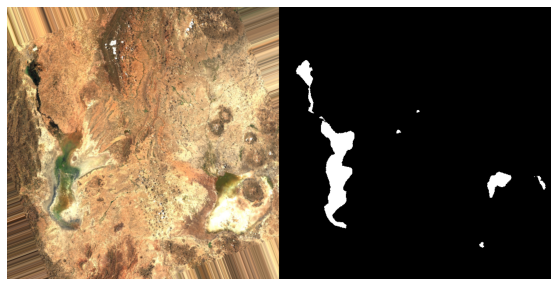

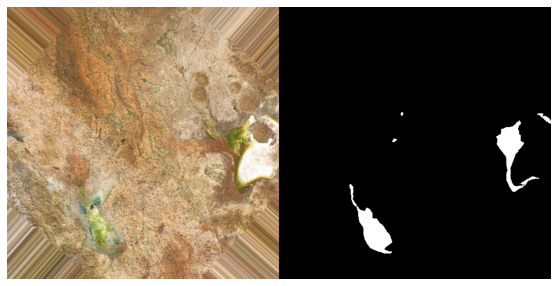

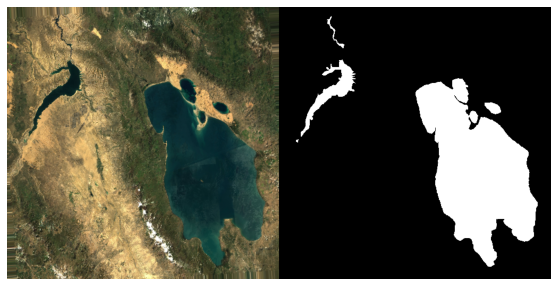

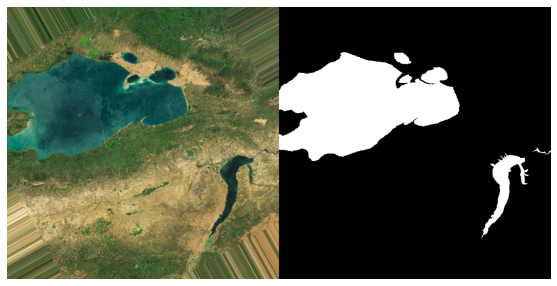

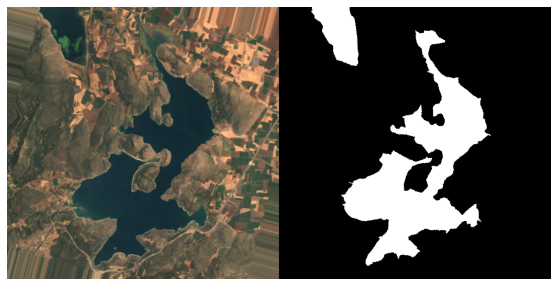

In [96]:
for i in range(BATCH_SIZE):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(get_pair(i))